In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Downloads\Datasets\Black Friday - Clustering.csv')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
dataset.drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'] , axis = 1, inplace = True)

In [5]:
dataset

,Occupation,Purchase
0,10,8370
1,10,15200
2,10,1422
3,10,1057
4,16,7969
...,...,...
550063,13,368
550064,1,371
550065,15,137
550066,1,365


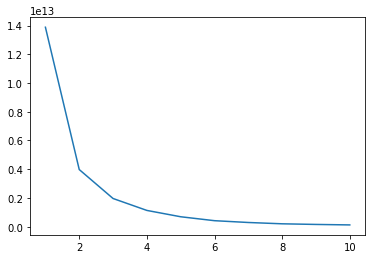

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = None)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = None)
y_means = kmeans.fit_predict(dataset)

In [9]:
y_means

array([1, 0, 1, ..., 1, 1, 1])

In [11]:
dataset['cluster'] = y_means
dataset.head(30)

,Occupation,Purchase,cluster
0,10,8370,1
1,10,15200,0
2,10,1422,1
3,10,1057,1
4,16,7969,1
5,15,15227,0
6,7,19215,0
7,7,15854,0
8,7,15686,0
9,20,7871,1


In [12]:
kmeans.cluster_centers_

array([[8.30100610e+00, 1.54538817e+04],
       [7.97132596e+00, 6.35580569e+03]])

In [13]:
dataset_first_clus= dataset[dataset['cluster'] == 1]
dataset_first_clus

,Occupation,Purchase,cluster
0,10,8370,1
2,10,1422,1
3,10,1057,1
4,16,7969,1
9,20,7871,1
...,...,...,...
550063,13,368,1
550064,1,371,1
550065,15,137,1
550066,1,365,1
